In [10]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [11]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [20]:
dataset.head(3)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0


In [12]:
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

(43797, 32)


In [16]:
reframed

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var1(t-2),var2(t-2),...,var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
3,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,...,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,...,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,...,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0
6,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,...,0.111111,0.0,0.105634,0.485294,0.213115,0.581818,0.666667,0.014492,0.148148,0.0
7,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,...,0.148148,0.0,0.124748,0.485294,0.229508,0.600000,0.666667,0.017551,0.000000,0.0
8,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0,0.105634,0.485294,...,0.000000,0.0,0.120724,0.470588,0.213115,0.600000,0.666667,0.020610,0.000000,0.0
9,0.105634,0.485294,0.213115,0.581818,0.666667,0.014492,0.148148,0.0,0.124748,0.485294,...,0.000000,0.0,0.132797,0.485294,0.229508,0.618183,0.666667,0.023669,0.000000,0.0
10,0.124748,0.485294,0.229508,0.600000,0.666667,0.017551,0.000000,0.0,0.120724,0.470588,...,0.000000,0.0,0.140845,0.485294,0.229508,0.636364,0.666667,0.029018,0.037037,0.0
11,0.120724,0.470588,0.213115,0.600000,0.666667,0.020610,0.000000,0.0,0.132797,0.485294,...,0.037037,0.0,0.152918,0.470588,0.229508,0.636364,0.666667,0.034367,0.000000,0.0
12,0.132797,0.485294,0.229508,0.618183,0.666667,0.023669,0.000000,0.0,0.140845,0.485294,...,0.000000,0.0,0.148893,0.470588,0.229508,0.636364,0.666667,0.039716,0.000000,0.0


In [13]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 24) 8760 (8760,)
(8760, 3, 8) (8760,) (35037, 3, 8) (35037,)


Train on 8760 samples, validate on 35037 samples
Epoch 1/50
 - 3s - loss: 0.0520 - val_loss: 0.0866
Epoch 2/50
 - 1s - loss: 0.0299 - val_loss: 0.0685
Epoch 3/50
 - 1s - loss: 0.0226 - val_loss: 0.0375
Epoch 4/50
 - 1s - loss: 0.0210 - val_loss: 0.0278
Epoch 5/50
 - 1s - loss: 0.0204 - val_loss: 0.0246
Epoch 6/50
 - 1s - loss: 0.0203 - val_loss: 0.0218
Epoch 7/50
 - 1s - loss: 0.0196 - val_loss: 0.0200
Epoch 8/50
 - 1s - loss: 0.0196 - val_loss: 0.0192
Epoch 9/50
 - 1s - loss: 0.0191 - val_loss: 0.0186
Epoch 10/50
 - 1s - loss: 0.0186 - val_loss: 0.0180
Epoch 11/50
 - 1s - loss: 0.0182 - val_loss: 0.0178
Epoch 12/50
 - 1s - loss: 0.0179 - val_loss: 0.0173
Epoch 13/50
 - 1s - loss: 0.0176 - val_loss: 0.0173
Epoch 14/50
 - 1s - loss: 0.0172 - val_loss: 0.0171
Epoch 15/50
 - 1s - loss: 0.0168 - val_loss: 0.0165
Epoch 16/50
 - 1s - loss: 0.0166 - val_loss: 0.0163
Epoch 17/50
 - 1s - loss: 0.0164 - val_loss: 0.0164
Epoch 18/50
 - 1s - loss: 0.0158 - val_loss: 0.0165
Epoch 19/50
 - 1s - loss

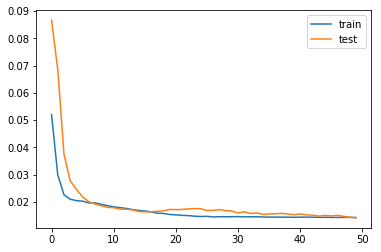

In [14]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [15]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.667
